In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

#importing the models
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor, ExtraTreesRegressor


# importing metrics for evaluation
from sklearn.metrics import r2_score, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/mac/Desktop/DataScience/Pojects_ds/Laptop_price_pred/Dataset/laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


- Unnamed column is of no use. Hence we are going to remove that col.
- There are no Null Values in our dataset

In [6]:
df.duplicated().sum()

0

- There are no duplicated values. Duplicated values are not good for analysis.

-- Dropping the unnamed 0 col.

In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Working on cols

In [9]:
df['Ram'] = df['Ram'].str.replace('GB','')

In [10]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [11]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [12]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


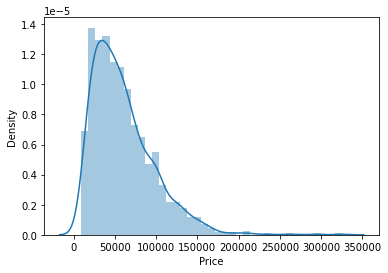

In [14]:
sns.distplot(df['Price']);

In [15]:
df['Price'].skew()

1.5208655681688517

- Our data is positivey skewed. And it is relevent as well because there is always inn abundance the commodities which have lower prices. Right Skewed.

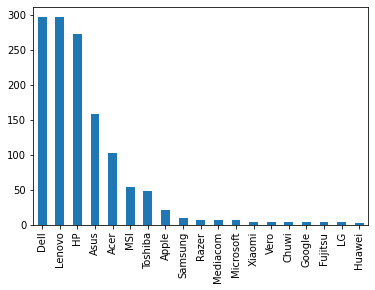

In [16]:
df['Company'].value_counts().plot(kind='bar');

- Most of the laptops are of Dell.

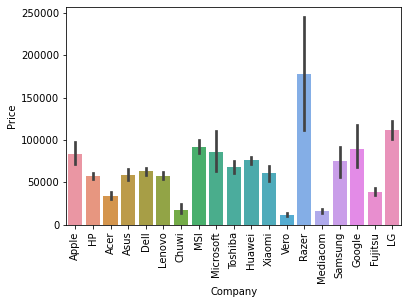

In [17]:
sns.barplot(df['Company'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Razer brand's laptops on an average is very costly.

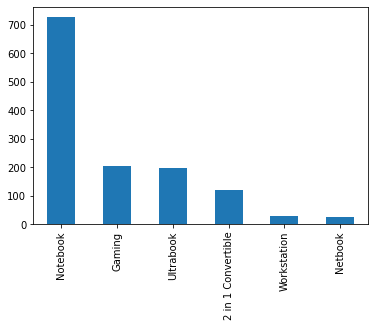

In [18]:
df['TypeName'].value_counts().plot(kind='bar');

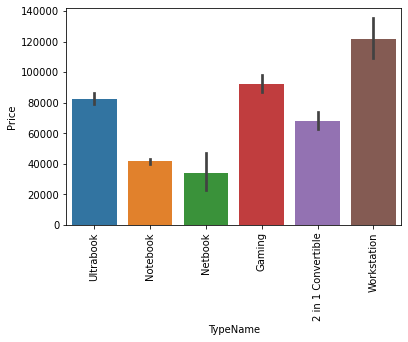

In [19]:
sns.barplot(df['TypeName'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Density'>

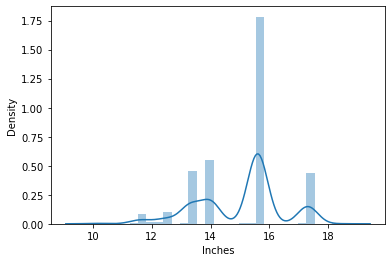

In [20]:
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

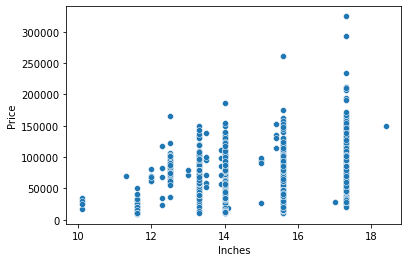

In [21]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [22]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [23]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [24]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


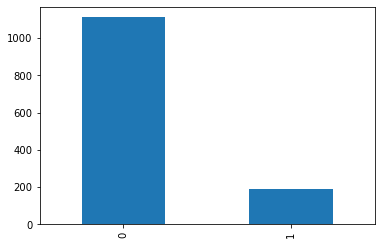

In [25]:
df['Touchscreen'].value_counts().plot(kind='bar');

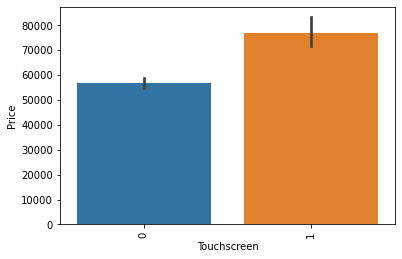

In [26]:
sns.barplot(df['Touchscreen'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()

- Touchscreen laptops are more expensive than normal laptops. Hence this feature is important to us.

In [27]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [28]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


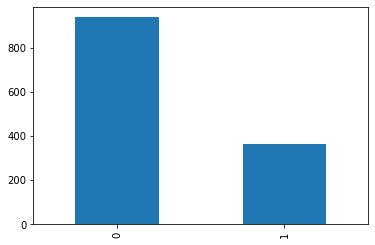

In [29]:
df['Ips'].value_counts().plot(kind='bar');

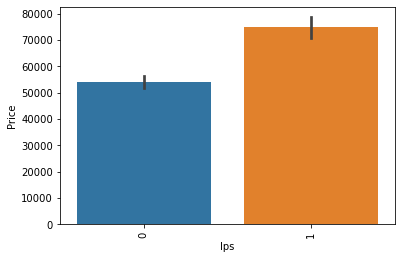

In [30]:
sns.barplot(df['Ips'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [31]:
new = df['ScreenResolution'].str.split('x',expand=True,n=1)

In [32]:
new.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [33]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [34]:
#for X_res we will use regex
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'[0-9]{3,4}').apply(lambda x:x[0])

In [35]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [36]:
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [38]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [39]:
#we are going to create a new col called 'PPI'
df['ppi'] = ((df["X_res"]**2)+(df["Y_res"]**2))**0.5/df["Inches"]

In [40]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [41]:
df['ppi'] = df['ppi'].astype('float32')

In [42]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [43]:
#dropping the cols
drop_cols = ['ScreenResolution','Inches','X_res','Y_res']
df.drop(drop_cols,axis=1,inplace=True)

In [44]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.212006
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534622
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983002


In [45]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [46]:
df['Cpu_name'] = df['Cpu'].apply(lambda x: " ".join(x.split(' ')[0:3]))

In [47]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.212006,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534622,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983002,Intel Core i5


In [48]:
df['Cpu_name'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'Intel Atom x5-Z8350',
       'AMD E-Series E2-9000e', 'Intel Atom x5-Z8300',
       'AMD E-Series E2-6110', 'AMD A6-Series 9220', 'Intel Celeron Dual',
       'AMD Ryzen 1700', 'Intel Pentium Quad', 'Intel Atom x5-Z8550',
       'AMD FX 9830P', 'AMD E-Series 6110', 'Intel Xeon E3-1505M',
       'AMD E-Series 9000e', 'AMD A10-Series A10-9620P',
       'AMD A6-Series A6-9220', 'AMD A10-Series 9600P',
       'AMD A8-Series 7410', 'AMD A12-Series 9720P', 'Intel Celeron Quad',
       'AMD Ryzen 1600', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Samsung Cortex A72&A53',
       'AMD E-Series 9000', 'AMD A9-Series 9410'], dtype=object)

In [49]:
def fetch_cpu(x):
    if x == 'Intel Core i5' or x =='Intel Core i7' or x =='Intel Core i3':
        return x
    else:
        if x.split()[0] == 'Intel':
            return 'Other Intel Processor'
        
        else:
            return 'AMD Processor' 

In [50]:
df['Cpu_name'] = df['Cpu_name'].apply(fetch_cpu)

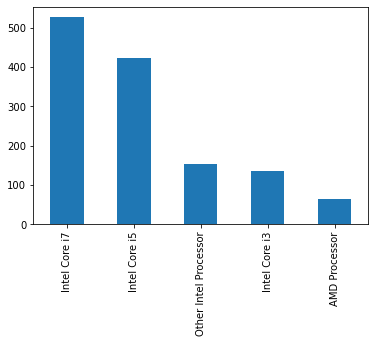

In [51]:
df['Cpu_name'].value_counts().plot(kind='bar');

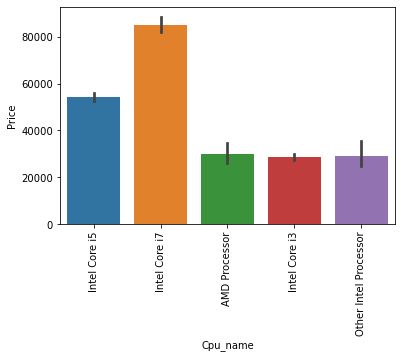

In [52]:
sns.barplot(df['Cpu_name'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
#dropping the col
df.drop('Cpu',axis=1,inplace=True)

In [54]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.212006,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534622,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983002,Intel Core i5


In [55]:
df['Price'] = df['Price'].astype('int32')

In [56]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983002,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.212006,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534622,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983002,Intel Core i5


<AxesSubplot:>

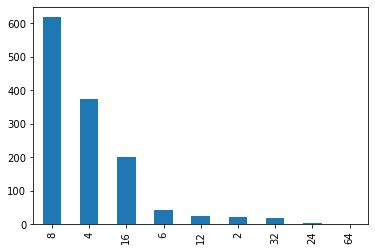

In [57]:
df['Ram'].value_counts().plot(kind = 'bar')

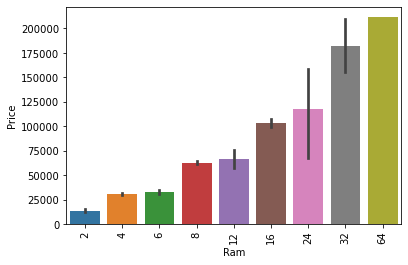

In [58]:
sns.barplot(df['Ram'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [59]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [60]:
df['Gpu_name'] = df['Gpu'].apply(lambda x:x.split(' ')[0])

In [61]:
df.drop('Gpu',axis=1,inplace=True)

In [62]:
df['Gpu_name'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_name, dtype: int64

In [63]:
#since this ARM is only one single data point. Therefore we can remove this row
df = df[df['Gpu_name'] != 'ARM']

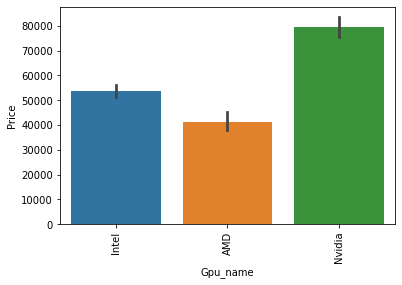

In [64]:
sns.barplot(df['Gpu_name'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [65]:
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_name,Gpu_name
0,Apple,Ultrabook,8,128GB SSD,macOS,1.37,71378,0,1,226.983002,Intel Core i5,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,macOS,1.34,47895,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,256GB SSD,No OS,1.86,30636,0,0,141.212006,Intel Core i5,Intel
3,Apple,Ultrabook,16,512GB SSD,macOS,1.83,135195,0,1,220.534622,Intel Core i7,AMD
4,Apple,Ultrabook,8,256GB SSD,macOS,1.37,96095,0,1,226.983002,Intel Core i5,Intel


In [66]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [67]:
#removing the .0 part
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')
new = df['Memory'].str.split('+',n=1,expand=True)

df['first'] = new[0]
df['first'] = df['first'].str.strip()
df['second'] = new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [68]:
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_name,Gpu_name,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,macOS,1.37,71378,0,1,226.983002,Intel Core i5,Intel,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,macOS,1.34,47895,0,0,127.677940,Intel Core i5,Intel,0,0,0,128
2,HP,Notebook,8,256 SSD,No OS,1.86,30636,0,0,141.212006,Intel Core i5,Intel,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,macOS,1.83,135195,0,1,220.534622,Intel Core i7,AMD,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,macOS,1.37,96095,0,1,226.983002,Intel Core i5,Intel,0,256,0,0


In [69]:
df.drop('Memory',axis=1,inplace=True)

In [70]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_name,Gpu_name,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,macOS,1.37,71378,0,1,226.983002,Intel Core i5,Intel,0,128,0,0
1,Apple,Ultrabook,8,macOS,1.34,47895,0,0,127.677940,Intel Core i5,Intel,0,0,0,128
2,HP,Notebook,8,No OS,1.86,30636,0,0,141.212006,Intel Core i5,Intel,0,256,0,0
3,Apple,Ultrabook,16,macOS,1.83,135195,0,1,220.534622,Intel Core i7,AMD,0,512,0,0
4,Apple,Ultrabook,8,macOS,1.37,96095,0,1,226.983002,Intel Core i5,Intel,0,256,0,0


In [71]:
df.corr()['Price']

Ram              0.742905
Weight           0.209867
Price            1.000000
Touchscreen      0.192917
Ips              0.253319
ppi              0.475368
HDD             -0.096892
SSD              0.670660
Hybrid           0.007942
Flash_Storage   -0.040067
Name: Price, dtype: float64

In [72]:
#dropping hybrid and flash_storage since neg corr with price
df.drop(['Hybrid','Flash_Storage'],axis=1,inplace=True)

In [73]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_name,Gpu_name,HDD,SSD
0,Apple,Ultrabook,8,macOS,1.37,71378,0,1,226.983002,Intel Core i5,Intel,0,128
1,Apple,Ultrabook,8,macOS,1.34,47895,0,0,127.677940,Intel Core i5,Intel,0,0
2,HP,Notebook,8,No OS,1.86,30636,0,0,141.212006,Intel Core i5,Intel,0,256
3,Apple,Ultrabook,16,macOS,1.83,135195,0,1,220.534622,Intel Core i7,AMD,0,512
4,Apple,Ultrabook,8,macOS,1.37,96095,0,1,226.983002,Intel Core i5,Intel,0,256


In [74]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [75]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [76]:
df['os'] = df['OpSys'].apply(cat_os)

In [77]:
df.drop('OpSys',axis=1,inplace=True)

In [78]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu_name,Gpu_name,HDD,SSD,os
0,Apple,Ultrabook,8,1.37,71378,0,1,226.983002,Intel Core i5,Intel,0,128,Mac
1,Apple,Ultrabook,8,1.34,47895,0,0,127.677940,Intel Core i5,Intel,0,0,Mac
2,HP,Notebook,8,1.86,30636,0,0,141.212006,Intel Core i5,Intel,0,256,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195,0,1,220.534622,Intel Core i7,AMD,0,512,Mac
4,Apple,Ultrabook,8,1.37,96095,0,1,226.983002,Intel Core i5,Intel,0,256,Mac


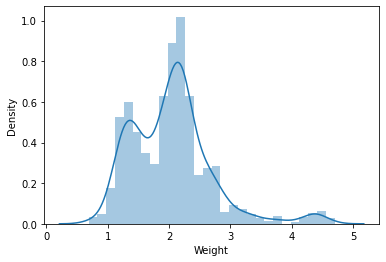

In [79]:
sns.distplot(df['Weight']);

- bimodal,2 ranges of laptop.

<AxesSubplot:xlabel='Weight', ylabel='Price'>

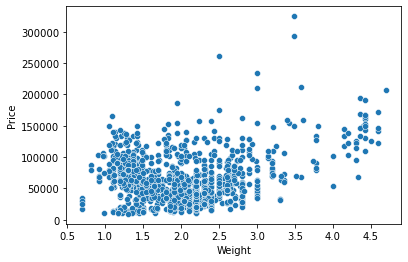

In [80]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

- weak linear relation

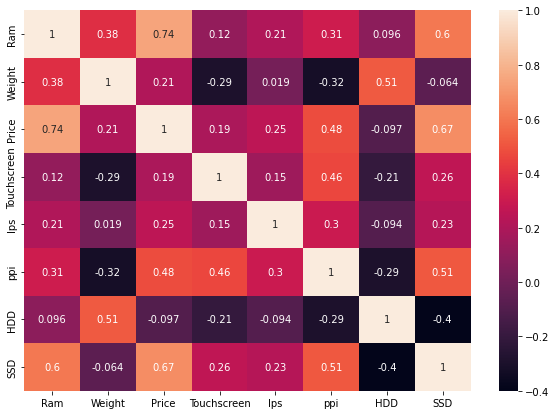

In [81]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True);

<AxesSubplot:xlabel='Price', ylabel='Density'>

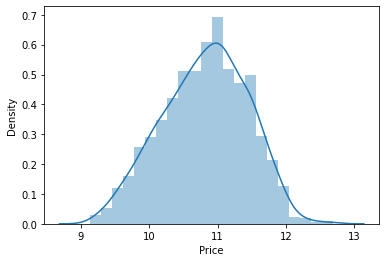

In [82]:
sns.distplot(np.log(df['Price']))

- skewed data, hence we are applying log transformation.

In [83]:
X = df.drop('Price',axis=1)
y = np.log(df['Price'])

In [84]:
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu_name,Gpu_name,HDD,SSD,os
0,Apple,Ultrabook,8,1.37,0,1,226.983002,Intel Core i5,Intel,0,128,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,Intel,0,0,Mac
2,HP,Notebook,8,1.86,0,0,141.212006,Intel Core i5,Intel,0,256,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534622,Intel Core i7,AMD,0,512,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983002,Intel Core i5,Intel,0,256,Mac


In [85]:
y

0       11.175745
1       10.776766
2       10.329931
3       11.814473
4       11.473093
          ...    
1298    10.433880
1299    11.288106
1300     9.409273
1301    10.614106
1302     9.886341
Name: Price, Length: 1302, dtype: float64

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 2,test_size=0.15)

In [87]:
X_train.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu_name,Gpu_name,HDD,SSD,os
183,Toshiba,Notebook,8,2.00,0,0,100.454666,Intel Core i5,Intel,0,128,Windows
1141,MSI,Gaming,8,2.40,0,0,141.212006,Intel Core i7,Nvidia,1000,128,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094208,Other Intel Processor,Intel,0,0,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.212006,Intel Core i3,Intel,1000,0,Windows
878,Dell,Notebook,4,2.18,0,0,141.212006,Intel Core i5,Nvidia,1000,128,Windows


## 1. Linear Regression

In [88]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print('R2_score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2_score: 0.8073285578868965
MAE: 0.21018098751398867


## 2. Ridge Regression

In [89]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
    
])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8127336176294268
MAE 0.2092709752983596


 ## 3. Ridge Regression

In [90]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
    
])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8127336176294268
MAE 0.2092709752983596


## 4. KNN

In [91]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8021985608224477
MAE 0.19319896436200582


## 5. Decision Tree

In [119]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8,max_features=10,random_state=100)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.816708729653776
MAE 0.19806974114103193


## 6. SVM

In [93]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8089708340942406
MAE 0.2021360524658012


## 7. Random Forest

In [134]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators = 100,
                             random_state = 45,
                             max_samples = 0.50,
                             max_features = 0.75,
                             max_depth = 20)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8878427584347921
MAE 0.15748101837381676


## 8. Adaboost

In [141]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7976535169699812
MAE 0.22478840009098724


## 9.Gradient Boosting 

In [96]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8830222822463425
MAE 0.15908360553399978


## 10. XGBoost

In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8811780009294151
MAE 0.16496369691449125


## 11. Voting Regressor
- A voting ensemble (or a “majority voting ensemble“) is an ensemble machine learning model that combines the predictions from multiple other models.

In [144]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8884971577710474
MAE 0.16009882480042648


## 12. Stacking

In [143]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=45,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8804619121066568
MAE 0.16785191052256546


## Exporting the model

- we are going to export the model of voting regressor. As it shows max r2_score as of now.

In [145]:
import pickle

#exporting the data and model
pickle.dump(df,open('lap_price_pred_model.pkl','wb'))
pickle.dump(pipe,open('lap_price_pred_pipe.pkl','wb'))